In [393]:
import pandas as pd
import numpy as np
import names
import matplotlib.pyplot as plt

## 1) Define all global variables and load the data

In [453]:
# create a list that contains all the possible states
STATES = ['Apple', 'Banana', 'Coffee', 'Doughnut', 'churned']

# create a list of all possible initial states
INIT_STATES = ['Apple', 'Banana', 'Coffee', 'Doughnut']

# create a dictionary for the translation between state and vectorized state
D = {'Apple': 0, 'Banana': 1, 'Coffee': 2, 'Doughnut': 3, 'churned': 4}

# chose the number of periods for the simmulation
N = 30

# chose the number of simulations to run (initial nr. of customers)
M = 100

# New customers per period
NC = int(M * 0.7)

# create a dataframe for the output
#output = pd.DataFrame()

# load and initialize the transition matrix
CUST = pd.read_csv('./data/customer_matrix.csv', index_col=0)
TRANS = pd.read_csv('./data/transition_probabilities.csv', index_col=0)

# Add the probabilites from the state 'churned'
churn_row = pd.DataFrame([[0, 0, 0, 0, 1]], columns=trans.columns)
TRANS = TRANS.append(churn_row)
TRANS = TRANS.rename({0: 'churned'}, axis='index')

# Create a dictionary mapping good and price
PRICES = dict(cust[['flavor', 'price']].values.tolist())

## 2.1) Define the class customer

In [454]:
class Customer:
    
    def __init__(self
                 , possible_initial_states\
                 , possible_states\
                 , transition_probabilities
                ):
        
        self.name = names.get_full_name()
        self.possible_states = possible_states
        self.transition_probabilities = transition_probabilities
        self.state = np.asscalar(np.random.choice(possible_initial_states, size=1))
        self.history = [self.state]
    
    
    def transition(self):
        # retrieve the transition probabilities for the current state from the transition matrix
        transition_prob = self.transition_probabilities.loc[self.state]

        # simulate the transition to a new state and save it
        self.state = np.asscalar(np.random.choice(self.possible_states, p=transition_prob, size=1))
        
        # append the state to self.history in order to track the history
        self.history.append(self.state)
        
    
    def get_history(slef):
        return self.history
    
    
#    def print_instance_name(self):
#        print (self.__class__.__name__)
    
    
    def __repr__(self):
        return f'''{self.name}'''

In [455]:
Maurice = Customer(INIT_STATES, STATES, TRANS)

In [456]:
Maurice.state

'Apple'

In [457]:
Maurice

Andrea Stewart

In [458]:
Maurice.transition()

In [459]:
Maurice.state, Maurice.history

('churned', ['Apple', 'churned'])

## 2.2) Create class Simulation

In [500]:
class Simulation:
    
    def __init__(self\
                 , total_periods\
                 , initial_cust_nr\
                 , new_cust_per_period\
                 , prices
                 , possible_initial_states\
                 , possible_states\
                 , transition_probabilities\
                 , mapping_items_ints
                ):
        
        self.total_periods = total_periods
        self.initial_cust_nr = initial_cust_nr
        self.new_cust_per_period = new_cust_per_period
        self.customers = []
        self.history = pd.DataFrame()
        self.prices = prices
        self.possible_initial_states = possible_initial_states
        self.possible_states = possible_states
        self.transition_probabilities = transition_probabilities
        self.mapping_items_ints = mapping_items_ints
            
    
    def create_customers(self):
        for i in range(self.initial_cust_nr):           
            customer = Customer(self.possible_initial_states,\
                                             self.possible_states,\
                                             self.transition_probabilities)

            self.customers.append(customer)
    
    
    def one_period_transition(self):
        for c in self.customers:
            c.transition()
    
    def create_history(self):
        for c in self.customers:
            self.history = pd.concat([self.history, pd.DataFrame(c.history)], axis=1)
            
        self.history = self.history.T.reset_index(drop=True)
        self.history.index.name = 'customer_id'

    
    def run_simulation(self):
        # first create the customers if they have not been created:
        if len(self.customers) > self.initial_cust_nr:
            print('Something went awefully wrong! Please reinitialize the simulation!')
            return 0
        elif len(self.customers) < self.initial_cust_nr:
            self.create_customers()
            print('Customers have been created.')
            
        
        #count how many periods have been simulated
        count = 0
        
        # run the simulation and add new customers for each period
        for p in range(self.total_periods):
            count += 1
            
            # simulate the transition for each customer
            for c in self.customers:
                c.transition()
                
            # add the new customers
            for nc in range(self.new_cust_per_period):
                customer = Customer(self.possible_initial_states, \
                                        self.possible_states, \
                                        self.transition_probabilities)
                customer.history = [None] * count + customer.history
                self.customers.append(customer)
        
        self.create_history()
        print('The simulation has ended successfully!')
    
    
    def plot_purchase_history(self):
        # create a dataframe containing the number of instances for each state in each period
        num = pd.DataFrame()

        for c in self.history.columns:

            counts = []
            name = ''

            for state in self.possible_states:

                out = self.history[c].str.count(state).sum()
                counts.append(out)

            counts = pd.Series(counts, name=f'{c}')
            num = pd.concat([num, counts], axis=1)
        
        # invert the dictionary D
        inv_D = {v: k for k, v in self.mapping_items_ints.items()}
        
        # rename the indices of the matrix
        num = num.rename(mapper=inv_D, axis='index').drop('churned', axis=0)

        # plot
        num.iloc[:,:-1].T.plot(figsize = (15, 6)\
          , title='Nr. of instances per state in each period (Nr. of customers in the market: {})'.format(M))\

        plt.xlabel('Period')
        plt.ylabel('Nr. of purchases')
            
    
    def __repr__(self):
        return f'''This simulation of a companie's customer purchase history runs for {self.total_periods} periods.
                \nInitialy the customer has {self.initial_cust_nr} customers and {self.new_cust_per_period} customers are added to the market in each period.
                \nThe prices for the goods are {self.prices}.\nLets run the simulation!!!
                '''

In [501]:
churn = Simulation(N, M, NC, PRICES, INIT_STATES, STATES, TRANS, D)

In [502]:
churn

This simulation of a companie's customer purchase history runs for 30 periods.
                
Initialy the customer has 100 customers and 70 customers are added to the market in each period.
                
The prices for the goods are {'Coffee': 1390.0, 'Banana': 750.0, 'Apple': 580.0, 'Doughnut': 590.0}.
Lets run the simulation!!!
                

In [503]:
churn.customers

[]

In [504]:
churn.create_customers()

In [505]:
len(churn.customers)

100

In [506]:
churn.run_simulation()

The simulation has ended successfully!


In [507]:
len(churn.customers)

2200

In [508]:
churn.history.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
customer_id,,,,,,,,,,,,,,,,,,,,,
0,Coffee,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
1,Banana,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
2,Coffee,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
3,Coffee,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
4,Coffee,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned


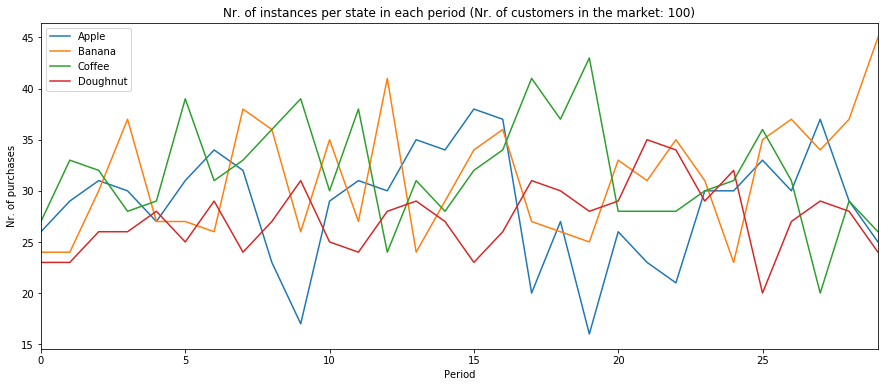

In [509]:
churn.plot_purchase_history()

In [496]:
test = Simulation(10, 10, 2, PRICES, INIT_STATES, STATES, TRANS, D)

In [497]:
test.run_simulation()

Customers have been created.
The simulation has ended successfully!


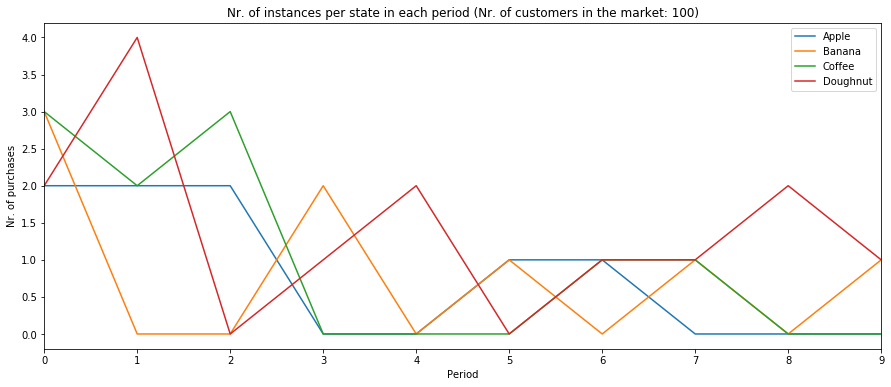

In [510]:
test.plot_purchase_history()